In [ ]:
# https://www.kaggle.com/cdeotte/tfrecord-experiments-upsample-and-coarse-dropout#Train-Experiments

In [107]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
names = ['times', 'folds', 'epoch', 'lr', 'auc_val','auc_train', 'LRAPS', 'lwlrap', 'train_loss', 'val_loss']
df = pd.read_csv('../logs/log_Res50_sfold_30epoch.txt', header = None, names = names)
df

,times,folds,epoch,lr,auc_val,auc_train,LRAPS,lwlrap,train_loss,val_loss
0,Sun Dec 6 21:00:49 2020,Fold:0,Epoch:0,lr:0.00003,Auc_val:0.51421,Auc_train:0.56877,LRAPS:0.17664,lwlrap:0.17664,train_loss:1.34573,val_loss:1.36991
1,Sun Dec 6 21:00:52 2020,Fold:0,Epoch:1,lr:0.00003,Auc_val:0.59114,Auc_train:0.89796,LRAPS:0.21558,lwlrap:0.21558,train_loss:1.13619,val_loss:1.31765
2,Sun Dec 6 21:00:54 2020,Fold:0,Epoch:2,lr:0.00003,Auc_val:0.82839,Auc_train:0.98739,LRAPS:0.38647,lwlrap:0.38647,train_loss:0.96536,val_loss:1.18936
3,Sun Dec 6 21:00:57 2020,Fold:0,Epoch:3,lr:0.00003,Auc_val:0.91884,Auc_train:0.99257,LRAPS:0.50673,lwlrap:0.50673,train_loss:0.86164,val_loss:1.08378
4,Sun Dec 6 21:01:00 2020,Fold:0,Epoch:4,lr:0.00003,Auc_val:0.96987,Auc_train:0.99791,LRAPS:0.70471,lwlrap:0.70471,train_loss:0.75236,val_loss:0.93886


In [53]:
df.auc = df.auc.str.split(':', n = 1,expand =True)[1].astype('float')

In [61]:
for col in names[1:]:
    df[col] = df[col].str.split(':', n = 1,expand =True)[1].astype('float')

In [62]:
df

,times,folds,epoch,lr,auc_val,auc_train,LRAPS,lwlrap,train_loss,val_loss
0,Sun Dec 6 21:00:49 2020,0.0,0.0,0.00003,0.51421,0.56877,0.17664,0.17664,1.34573,1.36991
1,Sun Dec 6 21:00:52 2020,0.0,1.0,0.00003,0.59114,0.89796,0.21558,0.21558,1.13619,1.31765
2,Sun Dec 6 21:00:54 2020,0.0,2.0,0.00003,0.82839,0.98739,0.38647,0.38647,0.96536,1.18936
3,Sun Dec 6 21:00:57 2020,0.0,3.0,0.00003,0.91884,0.99257,0.50673,0.50673,0.86164,1.08378
4,Sun Dec 6 21:01:00 2020,0.0,4.0,0.00003,0.96987,0.99791,0.70471,0.70471,0.75236,0.93886


Text(0.5, 1.0, 'need kernal')

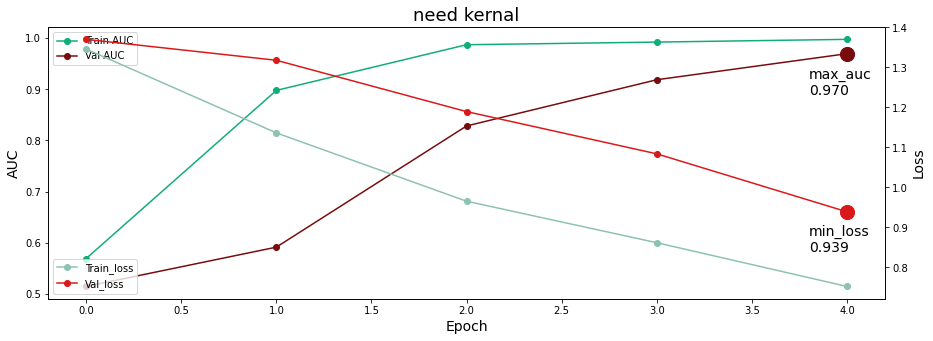

In [130]:
plt.figure(figsize= (15, 5))
plt.plot(df.epoch, df.auc_train, '-o', label = 'Train AUC', color = '#11ad77')
plt.plot(df.epoch, df.auc_val, '-o', label = 'Val AUC', color = '#780b0b')
x = np.argmax(df.auc_val)
y = np.max(df.auc_val)
plt.scatter(x, y, s = 200, color = '#780b0b')
plt.text(x-0.20, y-0.08, 'max_auc\n%.3f' % y, size = 14)
plt.ylabel('AUC',size=14)
plt.xlabel('Epoch',size=14)
plt.legend(loc=2)
plt2 = plt.gca().twinx()
plt2.plot(df.epoch, df.train_loss, '-o', label = 'Train_loss', color = '#8cc2af')
plt2.plot(df.epoch, df.val_loss, '-o', label = 'Val_loss', color = '#db1819')
x = np.argmin(df.val_loss)
y = np.min(df.val_loss)
plt2.scatter(x, y, s = 200, color = '#db1819')
plt2.text(x-0.20, y-0.10, 'min_loss\n%.3f' % y, size = 14)
plt.ylabel('Loss',size=14)
plt.legend(loc=3)
plt.title('need kernal', size = 18)
plt.show()  

In [184]:
def visual_train_result(log)->None:
    """
    take log file after train, *.txt
    save image or plot
    """
    names = ['times', 'folds', 'epoch', 'lr', 'auc_val','auc_train', 'LRAPS', 'lwlrap', 'train_loss', 'val_loss']
    df = pd.read_csv(os.path.join('../logs/', log), header = None, names = names)
    for col in names[1:]:
        df[col] = df[col].str.split(':', n = 1,expand =True)[1].astype('float')
        
    data, title, _ = os.path.basename(log).split('.')

    # plot
    plt.figure(figsize= (15, 5))
    plt.plot(df.epoch, df.auc_train, '-o', label = 'Train AUC', color = '#11ad77')
    plt.plot(df.epoch, df.auc_val, '-o', label = 'Val AUC', color = '#780b0b')
    x = np.argmax(df.auc_val)
    y = np.max(df.auc_val)
    plt.scatter(x, y, s = 200, color = '#780b0b')
    plt.text(x-0.20, y-0.08, 'max_auc\n%.3f' % y, size = 14)
    plt.ylabel('AUC',size=14)
    plt.xlabel('Epoch',size=14)
    plt.legend(loc=2)
    plt2 = plt.gca().twinx()
    plt2.plot(df.epoch, df.train_loss, '-o', label = 'Train_loss', color = '#8cc2af')
    plt2.plot(df.epoch, df.val_loss, '-o', label = 'Val_loss', color = '#db1819')
    x = np.argmin(df.val_loss)
    y = np.min(df.val_loss)
    plt2.scatter(x, y, s = 200, color = '#db1819')
    plt2.text(x-0.20, y-0.10, 'min_loss\n%.3f' % y, size = 14)
    plt.ylabel('Loss',size=14)
    plt.legend(loc=3)
    plt.title(title.replace('log_', ''), size = 18)
    plt.savefig(os.path.join('../logs/', f'{data}_{title}.png')) # before show

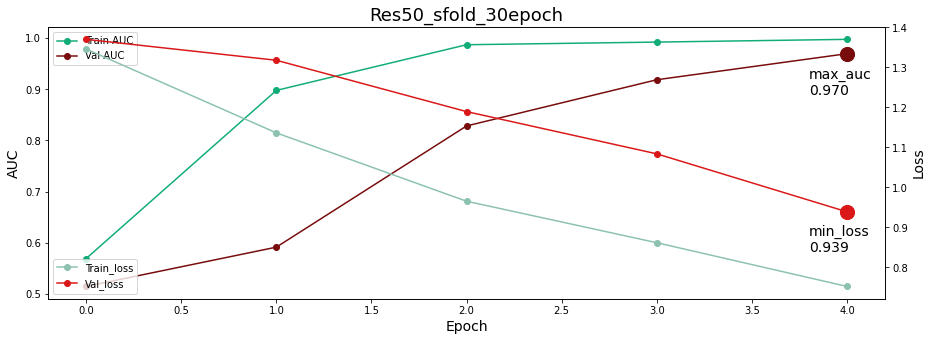

In [185]:
visual_train_result('Sun_Dec_6_23:54:39_2020.log_Res50_sfold_30epoch.txt')